In [40]:
#Import all relevant libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
import plotly.express as px
 
## This statement allows the visuals to render within your Jupyter Notebook.
%matplotlib inline


In [36]:
!pip install plotly

## Loading the data
We can now load the dataset into pandas using the read_csv() function. This converts the CSV file into a Pandas dataframe.

In [4]:
#Read in the csv file and convert to a Pandas dataframe
df_2015 = pd.read_csv("archive/2015.csv")
df_2016 = pd.read_csv("archive/2016.csv")
df_2017 = pd.read_csv("archive/2017.csv")
df_2018 = pd.read_csv("archive/2018.csv")
df_2019 = pd.read_csv('archive/2019.csv')

### Viewing the dataframe
We can get a quick sense of the size of our dataset by using the shape method. This returns a tuple with the number of rows and columns in the dataset.

In [7]:
df_2019.head(2)

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410


In [9]:
df_2019.shape

(156, 9)

## 1. Data Profiling:
Data profiling is a comprehensive process of examining the data available in an existing dataset and collecting statistics and information about that data. 

In [12]:
df_2019.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Overall rank                  156 non-null    int64  
 1   Country or region             156 non-null    object 
 2   Score                         156 non-null    float64
 3   GDP per capita                156 non-null    float64
 4   Social support                156 non-null    float64
 5   Healthy life expectancy       156 non-null    float64
 6   Freedom to make life choices  156 non-null    float64
 7   Generosity                    156 non-null    float64
 8   Perceptions of corruption     156 non-null    float64
dtypes: float64(7), int64(1), object(1)
memory usage: 11.1+ KB


In [14]:
df_2019.describe(include="all")

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
count,156.000000,156,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000
unique,NaN,156,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Finland,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,78.500000,NaN,5.407096,0.905147,1.208814,0.725244,0.392571,0.184846,0.110603
std,45.177428,NaN,1.113120,0.398389,0.299191,0.242124,0.143289,0.095254,0.094538
min,1.000000,NaN,2.853000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,39.750000,NaN,4.544500,0.602750,1.055750,0.547750,0.308000,0.108750,0.047000
50%,78.500000,NaN,5.379500,0.960000,1.271500,0.789000,0.417000,0.177500,0.085500
75%,117.250000,NaN,6.184500,1.232500,1.452500,0.881750,0.507250,0.248250,0.141250


In [16]:
df_2019.columns

Index(['Overall rank', 'Country or region', 'Score', 'GDP per capita',
       'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption'],
      dtype='object')

The process of profiling differs slightly for categorical and numerical variables due to their inherent differences.

**The two main types of data are:**
- Quantitative (numerical) data
- Qualitative (categorical) data

### Data Quality Checks
Data quality checks involve the process of ensuring that the data is accurate, complete, consistent, relevant, and reliable. 


**Here are typical steps involved in checking data quality:**

#### 1. Reliability:
Evaluate the data's source and collection process to determine its trustworthiness.

in the kaggle page mentioned data source. The data sources are collected from the United Nations General Assembly and you can check it
[from this link :worldhappiness.report](https://worldhappiness.report/analysis/) 

#### 2. Timeliness: 
Ensure the data is up-to-date and reflective of the current situation or the period of interest for the analysis.

### The data is not up-to-date but is support my analysis because the data to be analyzed is limited to a specific period (2015-2019)

#### 3. Consistency: 

Confirm that the data is consistent within the dataset and across multiple data sources. For example, the same data point should not have different values in different places.


### I cannot merge between datasets directly because each dataset is associated with a specific date(2015,2016...).
### If I want to merge this data I need to add a column representative date  

In [114]:
df_2015.head(2)

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201


In [123]:
df_merge = df_2015

In [127]:
df_merge['Year'] = np.nan

In [131]:
df_merge["Year"] = 2015

In [137]:
df_merge.head(2)

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Year
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,2015
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201,2015


In [153]:
df_merge.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 13 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Rank                 158 non-null    int64  
 3   Happiness Score                158 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       158 non-null    float64
 6   Family                         158 non-null    float64
 7   Health (Life Expectancy)       158 non-null    float64
 8   Freedom                        158 non-null    float64
 9   Trust (Government Corruption)  158 non-null    float64
 10  Generosity                     158 non-null    float64
 11  Dystopia Residual              158 non-null    float64
 12  Year                           158 non-null    int

In [139]:
df_2016["Year"] = 2016
df_2016.head(2)

,Country,Region,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Year
0,Denmark,Western Europe,1,7.526,7.460,7.592,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171,2.73939,2016
1,Switzerland,Western Europe,2,7.509,7.428,7.590,1.52733,1.14524,0.86303,0.58557,0.41203,0.28083,2.69463,2016


In [155]:
df_2016.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157 entries, 0 to 156
Data columns (total 14 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        157 non-null    object 
 1   Region                         157 non-null    object 
 2   Happiness Rank                 157 non-null    int64  
 3   Happiness Score                157 non-null    float64
 4   Lower Confidence Interval      157 non-null    float64
 5   Upper Confidence Interval      157 non-null    float64
 6   Economy (GDP per Capita)       157 non-null    float64
 7   Family                         157 non-null    float64
 8   Health (Life Expectancy)       157 non-null    float64
 9   Freedom                        157 non-null    float64
 10  Trust (Government Corruption)  157 non-null    float64
 11  Generosity                     157 non-null    float64
 12  Dystopia Residual              157 non-null    flo

In [169]:
df_merge = pd.concat([df_merge, df_2016], ignore_index=True)

In [175]:
df_merge

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Year,Lower Confidence Interval,Upper Confidence Interval
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,2015,NaN,NaN
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201,2015,NaN,NaN
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204,2015,NaN,NaN
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531,2015,NaN,NaN
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176,2015,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
310,Benin,Sub-Saharan Africa,153,3.484,NaN,0.39499,0.10419,0.21028,0.39747,0.06681,0.20180,2.10812,2016,3.404,3.564
311,Afghanistan,Southern Asia,154,3.360,NaN,0.38227,0.11037,0.17344,0.16430,0.07112,0.31268,2.14558,2016,3.288,3.432
312,Togo,Sub-Saharan Africa,155,3.303,NaN,0.28123,0.00000,0.24811,0.34678,0.11587,0.17517,2.13540,2016,3.192,3.414
313,Syria,Middle East and Northern Africa,156,3.069,NaN,0.74719,0.14866,0.62994,0.06912,0.17233,0.48397,0.81789,2016,2.936,3.202


In [238]:
df_2017.head(2)

,Country,Happiness.Rank,Happiness.Score,Whisker.high,Whisker.low,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual
0,Norway,1,7.537,7.594445,7.479556,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027
1,Denmark,2,7.522,7.581728,7.462272,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707


In [240]:
df_2017["Year"] = 2017
df_2017.head(2)

,Country,Happiness.Rank,Happiness.Score,Whisker.high,Whisker.low,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual,Year
0,Norway,1,7.537,7.594445,7.479556,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027,2017
1,Denmark,2,7.522,7.581728,7.462272,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707,2017


In [242]:
df_2017=df_2017.rename(columns={'Happiness.Rank': 'Happiness Rank','Happiness.Score':'Happiness Score','Economy..GDP.per.Capita.':'Economy (GDP per Capita)','Whisker.high':'Upper Confidence Interval','Whisker.low':'Lower Confidence Interval','Health..Life.Expectancy.':'Health (Life Expectancy)','Trust..Government.Corruption.':'Trust (Government Corruption)','Dystopia.Residual':'Dystopia Residual'})

In [244]:
df_2017

,Country,Happiness Rank,Happiness Score,Upper Confidence Interval,Lower Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Generosity,Trust (Government Corruption),Dystopia Residual,Year
0,Norway,1,7.537,7.594445,7.479556,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027,2017
1,Denmark,2,7.522,7.581728,7.462272,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707,2017
2,Iceland,3,7.504,7.622030,7.385970,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715,2017
3,Switzerland,4,7.494,7.561772,7.426227,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716,2017
4,Finland,5,7.469,7.527542,7.410458,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182,2017
...,...,...,...,...,...,...,...,...,...,...,...,...,...
150,Rwanda,151,3.471,3.543030,3.398970,0.368746,0.945707,0.326425,0.581844,0.252756,0.455220,0.540061,2017
151,Syria,152,3.462,3.663669,3.260331,0.777153,0.396103,0.500533,0.081539,0.493664,0.151347,1.061574,2017
152,Tanzania,153,3.349,3.461430,3.236570,0.511136,1.041990,0.364509,0.390018,0.354256,0.066035,0.621130,2017
153,Burundi,154,2.905,3.074690,2.735310,0.091623,0.629794,0.151611,0.059901,0.204435,0.084148,1.683024,2017


In [246]:
df_2017.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155 entries, 0 to 154
Data columns (total 13 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        155 non-null    object 
 1   Happiness Rank                 155 non-null    int64  
 2   Happiness Score                155 non-null    float64
 3   Upper Confidence Interval      155 non-null    float64
 4   Lower Confidence Interval      155 non-null    float64
 5   Economy (GDP per Capita)       155 non-null    float64
 6   Family                         155 non-null    float64
 7   Health (Life Expectancy)       155 non-null    float64
 8   Freedom                        155 non-null    float64
 9   Generosity                     155 non-null    float64
 10  Trust (Government Corruption)  155 non-null    float64
 11  Dystopia Residual              155 non-null    float64
 12  Year                           155 non-null    int

In [250]:
df_merge = pd.concat([df_merge, df_2017], ignore_index=True)

In [252]:
df_merge

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Year,Lower Confidence Interval,Upper Confidence Interval
0,Switzerland,Western Europe,1,7.587,0.03411,1.396510,1.349510,0.941430,0.665570,0.419780,0.296780,2.517380,2015,NaN,NaN
1,Iceland,Western Europe,2,7.561,0.04884,1.302320,1.402230,0.947840,0.628770,0.141450,0.436300,2.702010,2015,NaN,NaN
2,Denmark,Western Europe,3,7.527,0.03328,1.325480,1.360580,0.874640,0.649380,0.483570,0.341390,2.492040,2015,NaN,NaN
3,Norway,Western Europe,4,7.522,0.03880,1.459000,1.330950,0.885210,0.669730,0.365030,0.346990,2.465310,2015,NaN,NaN
4,Canada,North America,5,7.427,0.03553,1.326290,1.322610,0.905630,0.632970,0.329570,0.458110,2.451760,2015,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
465,Rwanda,NaN,151,3.471,NaN,0.368746,0.945707,0.326425,0.581844,0.455220,0.252756,0.540061,2017,3.398970,3.543030
466,Syria,NaN,152,3.462,NaN,0.777153,0.396103,0.500533,0.081539,0.151347,0.493664,1.061574,2017,3.260331,3.663669
467,Tanzania,NaN,153,3.349,NaN,0.511136,1.041990,0.364509,0.390018,0.066035,0.354256,0.621130,2017,3.236570,3.461430
468,Burundi,NaN,154,2.905,NaN,0.091623,0.629794,0.151611,0.059901,0.084148,0.204435,1.683024,2017,2.735310,3.074690


#### Now the dataset is ready to work with it

#### As we can see, we have slightly different columns and additional columns. We need to deal with these to make sure all datasets are consistent for merging.

#### 4. Relevance: 
Assess whether the data is appropriate and applicable for the intended analysis. Data that is not relevant can skew results and lead to incorrect conclusions.

**Key considerations for relevance include:**

> 1. Sample Appropriateness: Confirm that your data sample aligns with your analysis objectives. For instance, utilizing data from the Northern region will not yield accurate insights for the Western region of the Kingdom.
>
> 2. Variable Selection: Any column will not be relevant for our analysis, we can get rid of these using the drop() method. We will set the “axis” argument to 1 since we’re dealing with columns, and set the “inplace” argument to True to make the change permanent.


In [255]:
df_merge.head(2) # contains three datasets (2015 to 2017)

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Year,Lower Confidence Interval,Upper Confidence Interval
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,2015,NaN,NaN
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201,2015,NaN,NaN


In [120]:
df_2019.head(2)

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410


### The data in 2019 is relevant, so there isn't a need to delete columns and it aligns with my analysis objectives 

#### 5. Uniqueness: 
Check for and remove duplicate records to prevent skewed analysis results.


In [207]:
df_2019.duplicated().sum()

0

In [125]:
df_2019[df_2019["Overall rank"].duplicated(keep=False)]

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption


In [127]:
df_2019[df_2019["Country or region"].duplicated(keep=False)]

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption


In [129]:
df_2019[df_2019["Score"].duplicated(keep=False)]# the duplication in this situation is logical 

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
88,89,Morocco,5.208,0.801,0.782,0.782,0.418,0.036,0.076
89,90,Azerbaijan,5.208,1.043,1.147,0.769,0.351,0.035,0.182


### I don't find the illogical duplicates such as overall rank and countries exist in this data set

#### 6. Completeness: 
Ensure that no critical data is missing. This might mean checking for null values or required fields that are empty.

We will start by checking the dataset for missing or null values. For this, we can use the isna() method which returns a dataframe of boolean values indicating if a field is null or not. To group all missing values by column, we can include the sum() method.

In [134]:
#Display number missing values per column
df_2019.isnull().sum()

Overall rank                    0
Country or region               0
Score                           0
GDP per capita                  0
Social support                  0
Healthy life expectancy         0
Freedom to make life choices    0
Generosity                      0
Perceptions of corruption       0
dtype: int64

In [257]:
df_merge.isnull().sum() # # The null is reasonable because we merge three datasets (2015 to 2017)


Country                            0
Region                           155
Happiness Rank                     0
Happiness Score                    0
Standard Error                   312
Economy (GDP per Capita)           0
Family                             0
Health (Life Expectancy)           0
Freedom                            0
Trust (Government Corruption)      0
Generosity                         0
Dystopia Residual                  0
Year                               0
Lower Confidence Interval        158
Upper Confidence Interval        158
dtype: int64

#### 7. Check Accuracy:

Verify that the data is correct and precise. This could involve comparing data samples with known sources or using validation rules.

**The process includes:**
1. Validating the appropriateness of data types for the dataset.
2. Identifying outliers  using established validation  rule

In [205]:
# check columns types 
df_2019.dtypes

Overall rank                      int64
Country or region                object
Score                           float64
GDP per capita                  float64
Social support                  float64
Healthy life expectancy         float64
Freedom to make life choices    float64
Generosity                      float64
Perceptions of corruption       float64
dtype: object

In [44]:
# go to clean them 

In [46]:
# check outliers 


**What is an Outlier?** 
Outlier is an row/observation that appears far away and diverges from an overall pattern in a sample.

**What are the types of Outliers?**
1. Univariate: These outliers can be found when we look at distribution of a single variable
2. Multivariate: are outliers in an n-dimensional space. In order to find them, you have to look at distributions in multi-dimensions. example (hight=100, weight=100) for a person

**What causes Outliers?**
Whenever we come across outliers, the ideal way to tackle them is to find out the reason of having these outliers. The method to deal with them would then depend on the reason of their occurrence.

Let’s understand various types of outliers:

1. Data Entry Errors:- Human errors such as errors caused during data collection, recording, or entry can cause outliers in data.
2. Measurement Error: It is the most common source of outliers. This is caused when the measurement instrument used turns out to be faulty.
3. Data Processing Error: Whenever we perform data mining, we extract data from multiple sources. It is possible that some manipulation or extraction errors may lead to outliers in the dataset.
4. Sampling error: For instance, we have to measure the height of athletes. By mistake, we include a few basketball players in the sample. This inclusion is likely to cause outliers in the dataset.
5. Natural Outlier: When an outlier is not artificial (due to error), it is a natural outlier. For instance: In my last assignment with one of the renowned insurance company, I noticed that the performance of top 50 financial advisors was far higher than rest of the population. Surprisingly, it was not due to any error. Hence, whenever we perform any data mining activity with advisors, we used to treat this segment separately.


**What is the impact of Outliers on a dataset?**


![image.png](https://www.analyticsvidhya.com/wp-content/uploads/2015/02/Outlier_31.png)



**How to detect Outliers?**

1. Most commonly used method to detect outliers is visualization (Univariate Graphical Analysis).

We use 3 common visualization methods:
>- Box-plot: A box plot is a method for graphically depicting groups of numerical data through their quartiles. The box extends from the Q1 to Q3 quartile values of the data, with a line at the median (Q2). The whiskers extend from the edges of the box to show the range of the data. Outlier points are those past the end of the whiskers. Box plots show robust measures of location and spread as well as providing information about symmetry and outliers.
>
>  
>![image.png](https://miro.medium.com/v2/resize:fit:698/format:webp/1*VK5iHA2AB28HSZwWwUbNYg.png)
>
>
>- Histogram
>- Scatter Plot: A scatter plot is a mathematical diagram using Cartesian coordinates to display values for two variables for a set of data. The data are displayed as a collection of points, each having the value of one variable determining the position on the horizontal axis and the value of the other variable determining the position on the vertical axis. The points that are far from the population can be termed as an outlier.
>
>  
>![image.png](https://miro.medium.com/v2/resize:fit:4800/format:webp/1*Ov6aH-8yIwNoUxtMFwgx4g.png)
>
>

2. Using statistical method (Univariate Non-Graphical analysis):
>- Any value, which is beyond the range of -1.5 x IQR to 1.5 x IQR
 
![image.png](https://www.whatissixsigma.net/wp-content/uploads/2015/07/Box-Plot-Diagram-to-identify-Outliers-figure-1.png)

>- Use capping methods. Any value which out of range of 5th and 95th percentile can be considered as outlier
>- Data points, three or more standard deviation away from mean are considered outlier: The Z-score is the signed number of standard deviations by which the value of an observation or data point is above the mean value of what is being observed or measured. While calculating the Z-score we re-scale and center the data and look for data points that are too far from zero. These data points which are way too far from zero will be treated as the outliers. In most of the cases, a threshold of 3 or -3 is used i.e if the Z-score value is greater than or less than 3 or -3 respectively, that data point will be identified as outliers.
> - Outlier detection is merely a special case of the examination of data for influential data points and it also depends on the business understanding


In [49]:
# go to univariate graphical analysis
# go to lesson : data visualisation 1 - chart type section
# then go to univariate graphical analysis
# detect outliers using graphs varbaly

In [51]:
# go to lesson: statistics 1 then statistics 3
# then go to univariate Non graphical analysis
# detect outliers using numerical statistics 

In [54]:
# go to delete ouliers

## 2. Data Cleaning: 

Preliminary findings from data profiling can lead to cleaning the data by:
- Handling missing values
- Correcting errors.
- Dealing with outliers.

-------------------



### Handling missing values:

**Why my data has missing values?**
They may occur at two stages:
1. Data Extraction: It is possible that there are problems with extraction process. Errors at data extraction stage are typically easy to find and can be corrected easily as well.
2. Data collection: These errors occur at time of data collection and are harder to correct.

**Why do we need to handle the missing data?**
To avoid:
- Bias the conclusions.
- Leading the business to make wrong decisions.

**Which are the methods to treat missing values ?**
1. Deletion: we delete rows where any of the variable is missing. Simplicity is one of the major advantage of this method, but this method reduces the power of model because it reduces the sample size.

2. Imputation: is a method to fill in the missing values with estimated ones. This imputation is one of the most frequently used methods.

    2.1. Mean/ Mode/ Median Imputation: It consists of replacing the missing data for a given attribute by the mean or median (quantitative attribute) or mode (qualitative attribute) of all known values of that variable.
    > It can be of two types:
    > - Generalized Imputation: In this case, we calculate the mean or median for all non missing values of that variable then replace missing value with mean or median.
    > - Similar case Imputation: In this case, we calculate average for each group individually of non missing values then replace the missing value based on the group.

    2.2. Constant Value
   
    2.3. Forward Filling
   
    2.4. Backward Filling

6. Prediction Model:  Prediction model is one of the sophisticated method for handling missing data. Here, we create a predictive model to estimate values that will substitute the missing data.  In this case, we divide our data set into two sets: One set with no missing values for the variable and another one with missing values. First data set become training data set of the model while second data set with missing values is test data set and variable with missing values is treated as target variable. Next, we create a model to predict target variable based on other attributes of the training data set and populate missing values of test data set.

> There are 2 drawbacks for this approach:
> - The model estimated values are usually more well-behaved than the true values
> - If there are no relationships with attributes in the data set and the attribute with missing values, then the model will not be precise for estimating missing values.

9. KNN Imputation: In this method of imputation, the missing values of an attribute are imputed using the given number of attributes that are most similar to the attribute whose values are missing. The similarity of two attributes is determined using a distance function. It is also known to have certain advantage & disadvantages.

   > **Advantages:**
   > - k-nearest neighbour can predict both qualitative & quantitative attributes
   > - Creation of predictive model for each attribute with missing data is not required
   > - Attributes with multiple missing values can be easily treated
   > - Correlation structure of the data is taken into consideration

   > **Disadvantage:**
   > - KNN algorithm is very time-consuming in analyzing large database. It searches through all the dataset looking for the most similar instances.
   > - Choice of k-value is very critical. Higher value of k would include attributes which are significantly different from what we need whereas lower value of k implies missing out of significant attributes.

--------------------


In [139]:
df_2019.describe()

,Overall rank,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
count,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000
mean,78.500000,5.407096,0.905147,1.208814,0.725244,0.392571,0.184846,0.110603
std,45.177428,1.113120,0.398389,0.299191,0.242124,0.143289,0.095254,0.094538
min,1.000000,2.853000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,39.750000,4.544500,0.602750,1.055750,0.547750,0.308000,0.108750,0.047000
50%,78.500000,5.379500,0.960000,1.271500,0.789000,0.417000,0.177500,0.085500
75%,117.250000,6.184500,1.232500,1.452500,0.881750,0.507250,0.248250,0.141250
max,156.000000,7.769000,1.684000,1.624000,1.141000,0.631000,0.566000,0.453000


In [183]:
df_2019.head(2)

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410


In [ ]:
# go back to 6th dimention --> Completeness

### Correcting errors

-------------------

In [ ]:
# go back to 7th dimension Accuracy 

### Dealing with outliers:

**How to remove Outliers?**
Most of the ways to deal with outliers are similar to the methods of missing values like deleting rows, transforming them, binning them, treat them as a separate group, imputing values and other statistical methods. Here, we will discuss the common techniques used to deal with outliers:

1. Deleting rows: We delete outlier values if it is due to data entry error, data processing error or outlier rows are very small in numbers. We can also use trimming at both ends to remove outliers.

2. Imputing: Like imputation of missing values, we can also impute outliers. We can use mean, median, mode imputation methods. Before imputing values, we should analyse if it is natural outlier or artificial. If it is artificial, we can go with imputing values. We can also use statistical model to predict values of outlier rows and after that we can impute it with predicted values.

3. Treat separately: If there are significant number of outliers, we should treat them separately in the statistical model. One of the approach is to treat both groups as two different groups and build individual model for both groups and then combine the output.


## 3. Univariate Analysis: 

This involves examining single variables to understand their characteristics (distribution, central tendency, dispersion, and shape).

We calculate **numerical values** about the data that tells us about the distribution of the data. We also **draw graphs** showing visually how the data is distributed. **To answer the following questions about Features/characteristics of Data:**
- Where is the center of the data? (location)
- How much does the data vary? (scale)
- What is the shape of the data? (shape)

**The benefits of this analysis:**
Statistics summary gives a high-level idea to identify whether the data has any outliers, data entry error, distribution of data such as the data is normally distributed or left/right skewed

**In this step, we will explore variables one by one using following approaches:**

### 1. Univariate Graphical Analysis:
Method to perform uni-variate analysis will depend on whether the variable type is categorical or numerical.

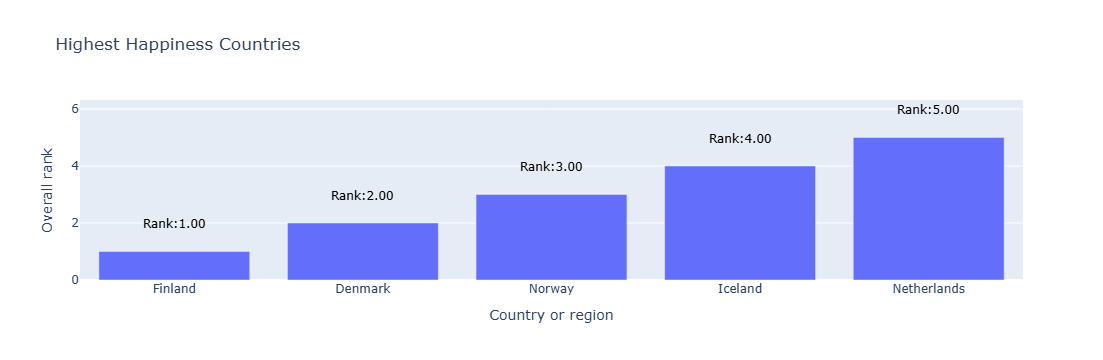

#### I. Categorical Variables:

we’ll use frequency table to understand distribution of each category
- Bar Chart (Ordinal) - Orderd
- Pie Chart (Nominal) - non Orderd

#### II. Numerical Variables:

we need to understand the central tendency and spread of the variable (Descriptive Analysis) using:
   - Box plot
   - Histogram

### 2. Univariate Non-Graphical analysis: 

- Where is the center of the data? (location) --> **Measures of central tendency**
- How much does the data vary? (scale) --> **Measure of variability**
- What is the shape of the data? (shape) --> **Measures of variation combined with an average (measure of center) gives a good picture of the distribution of the data.**

## 4. Bivariate/Multivariate Analysis:

Here, you look at the relationships between two or more variables. This can involve looking for correlations, patterns, and trends that suggest a relationship or an association.

We can perform bi-variate analysis for any combination of categorical and numerical variables. The combination can be:
| bi-variate variables   | Plot type |
| ------------- | ------------- |
| Categorical & Categorical| Stacked Bar Chart |
| Categorical & numerical  | scatter plot, histogram, box plot|
| numerical  & numerical  | Scatter plot, line chart| 


Multivariate Analysis:
- Heat map
- Bar Chart
- Scatter Chart
- Line Chart

**Categorical & Categorical --> (Stacked Column Chart)**

**Categorical & numerical --> (scatter plot, histogram, box plot)**

In [ ]:
# Q1 Part 1
fig = px.bar(df_2019.head(5),x="Country or region",y="Overall rank", title="Highest Happiness Countries")
for index, row in df_2019.head(5).iterrows():
    fig.add_annotation(
        x=row['Country or region'],
        y=row['Overall rank'] + 1,  # Slightly above the bar
        text=f"Rank:{row['Overall rank']:.2f}",
        showarrow=False,
        font=dict(size=12, color='black')
    )

# Show the plot
fig.show()

**numerical & numerical --> (Scatter plot, line chart)**

In [109]:
df_2019_num = df_2019.drop(columns="Country or region",axis=1)
df_2019_num.head(1)

,Overall rank,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,7.769,1.34,1.587,0.986,0.596,0.153,0.393


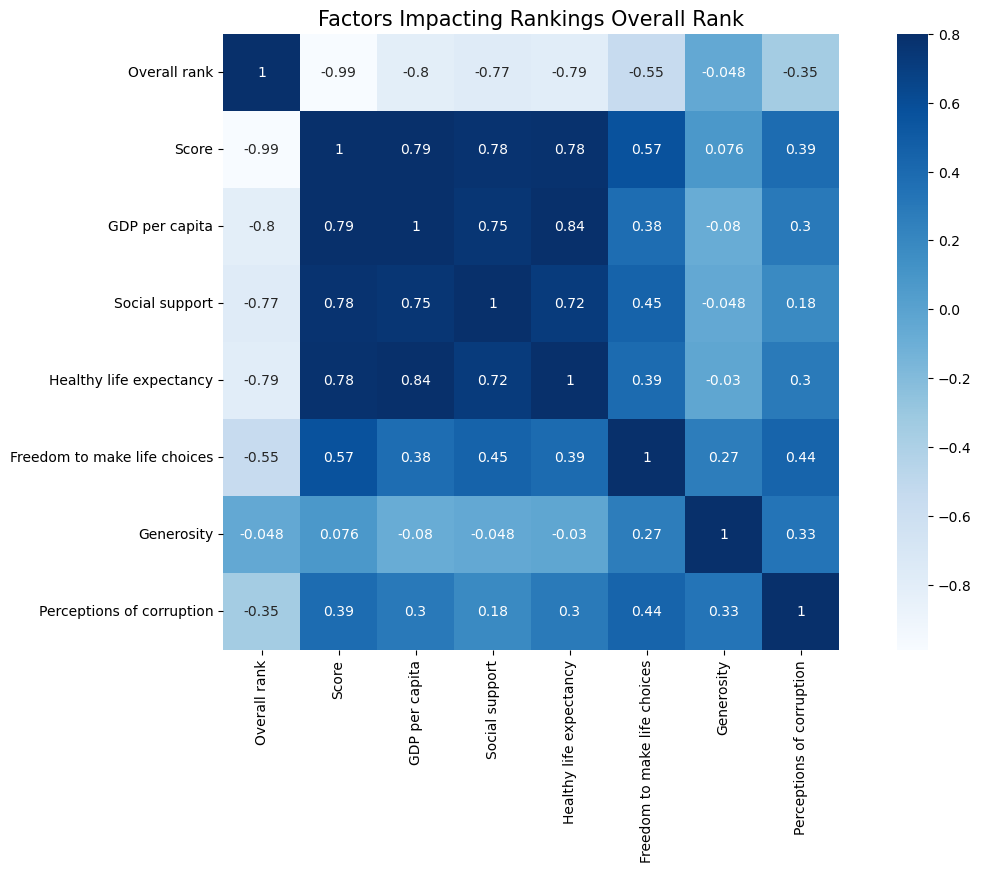

In [111]:
#Q1 Part 2
fig, ax = plt.subplots() 
fig.set_size_inches(15,8)
sns.heatmap(df_2019_num.corr(), vmax =.8, square = True, annot = True,cmap='Blues' )
plt.title('Factors Impacting Rankings Overall Rank',fontsize=15);

The top impact of **Overall Rank**:
- Score(Negative relationship)
- GDP per capita
- Healthy life expectancy
- social support

In [259]:
# Q2- How did country ranks or scores change between the 2015 and 2016 as well as the 2016 and 2017 reports?

In [261]:
df_merge.head(2)

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Year,Lower Confidence Interval,Upper Confidence Interval
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,2015,NaN,NaN
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201,2015,NaN,NaN


In [265]:
df_rank_all_years = df_merge[['Country','Happiness Rank','Happiness Score','Year']]
df_rank_all_years.head(2)

,Country,Happiness Rank,Happiness Score,Year
0,Switzerland,1,7.587,2015
1,Iceland,2,7.561,2015


In [307]:
df_rank_all_years[df_rank_all_years['Year'] == 2015].head(10).loc[:,"Happiness Rank"]

0     1
1     2
2     3
3     4
4     5
5     6
6     7
7     8
8     9
9    10
Name: Happiness Rank, dtype: int64

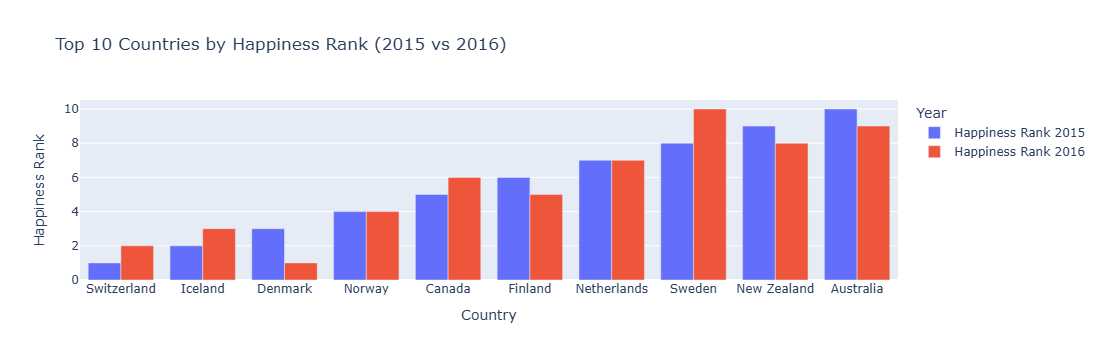

In [329]:
import plotly.graph_objects as px


plot = px.Figure(data=[px.Bar(
    name = 'Happiness Rank 2015',
    x = df_rank_all_years[df_rank_all_years['Year'] == 2015].head(10).loc[:,"Country"],
    y = df_rank_all_years[df_rank_all_years['Year'] == 2015].head(10).loc[:,"Happiness Rank"]
   ),
                       px.Bar(
    name = 'Happiness Rank 2016',
    x = df_rank_all_years[df_rank_all_years['Year'] == 2016].head(10).loc[:,"Country"],
    y = df_rank_all_years[df_rank_all_years['Year'] == 2016].head(10).loc[:,"Happiness Rank"]
   )
])

plot.update_layout(
    title='Top 10 Countries by Happiness Rank (2015 vs 2016)',
    xaxis_title='Country',
    yaxis_title='Happiness Rank',
    legend_title='Year'
)

plot.show()     

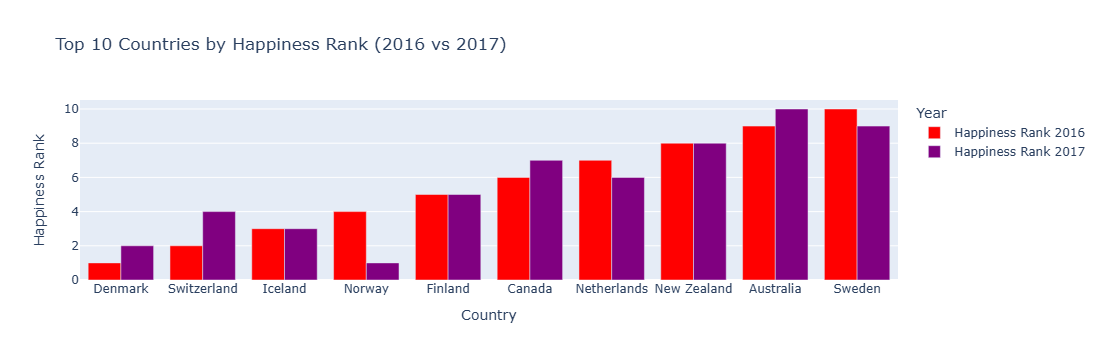

In [325]:
plot = px.Figure(data=[px.Bar(
    name = 'Happiness Rank 2016',
    x = df_rank_all_years[df_rank_all_years['Year'] == 2016].head(10).loc[:,"Country"],
    y = df_rank_all_years[df_rank_all_years['Year'] == 2016].head(10).loc[:,"Happiness Rank"],
    marker_color='red'
   ),
                       px.Bar(
    name = 'Happiness Rank 2017',
    x = df_rank_all_years[df_rank_all_years['Year'] == 2017].head(10).loc[:,"Country"],
    y = df_rank_all_years[df_rank_all_years['Year'] == 2017].head(10).loc[:,"Happiness Rank"],
     marker_color = 'purple'                      
   )
])

plot.update_layout(
    title='Top 10 Countries by Happiness Rank (2016 vs 2017)',
    xaxis_title='Country',
    yaxis_title='Happiness Rank',
    legend_title='Year'
)

plot.show()     

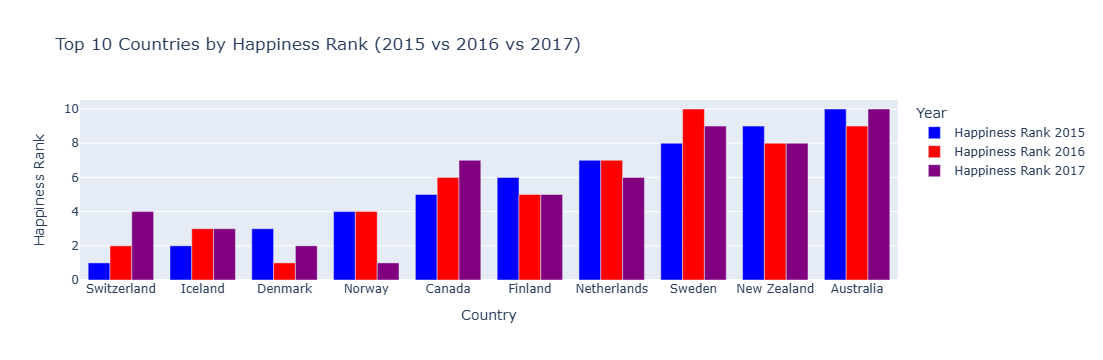

In [331]:
plot = px.Figure(data=[px.Bar(
    name = 'Happiness Rank 2015',
    x = df_rank_all_years[df_rank_all_years['Year'] == 2015].head(10).loc[:,"Country"],
    y = df_rank_all_years[df_rank_all_years['Year'] == 2015].head(10).loc[:,"Happiness Rank"],
      marker_color='blue'                     
   ),
    
    
    px.Bar(
    name = 'Happiness Rank 2016',
    x = df_rank_all_years[df_rank_all_years['Year'] == 2016].head(10).loc[:,"Country"],
    y = df_rank_all_years[df_rank_all_years['Year'] == 2016].head(10).loc[:,"Happiness Rank"],
    marker_color='red'
   ),
                       
                       px.Bar(
    name = 'Happiness Rank 2017',
    x = df_rank_all_years[df_rank_all_years['Year'] == 2017].head(10).loc[:,"Country"],
    y = df_rank_all_years[df_rank_all_years['Year'] == 2017].head(10).loc[:,"Happiness Rank"],
     marker_color = 'purple'                      
   )
])

plot.update_layout(
    title='Top 10 Countries by Happiness Rank (2015 vs 2016 vs 2017)',
    xaxis_title='Country',
    yaxis_title='Happiness Rank',
    legend_title='Year'
)

plot.show()    

## Insights:
- **Switzerland was ranked first in 2015 and then dropped to fourth in 2017.**
- **Denmark got the 1st rank in 2016 and 2th in 2017.**
- **Norway ranked fourth in a row (15-16)and then first in 2017.**

In [361]:
df_rank_all_years['Country'].value_counts()

Country
Switzerland                 3
Mongolia                    3
Lebanon                     3
Hungary                     3
Honduras                    3
                           ..
Puerto Rico                 1
Somaliland Region           1
Oman                        1
Taiwan Province of China    1
Hong Kong S.A.R., China     1
Name: count, Length: 166, dtype: int64

In [389]:
df_rank_all_years

,Country,Happiness Rank,Happiness Score,Year
0,Switzerland,1,7.587,2015
1,Iceland,2,7.561,2015
2,Denmark,3,7.527,2015
3,Norway,4,7.522,2015
4,Canada,5,7.427,2015
...,...,...,...,...
465,Rwanda,151,3.471,2017
466,Syria,152,3.462,2017
467,Tanzania,153,3.349,2017
468,Burundi,154,2.905,2017


In [405]:
df_rank_all_years.describe(include="all")

,Country,Happiness Rank,Happiness Score,Year
count,470,470.000000,470.000000,470.000000
unique,166,NaN,NaN,NaN
top,Switzerland,NaN,NaN,NaN
freq,3,NaN,NaN,NaN
mean,NaN,78.829787,5.370728,2015.993617
std,NaN,45.281408,1.136998,0.816907
min,NaN,1.000000,2.693000,2015.000000
25%,NaN,40.000000,4.509000,2015.000000
50%,NaN,79.000000,5.282500,2016.000000
75%,NaN,118.000000,6.233750,2017.000000


In [399]:
df_rank_all_years[df_rank_all_years["Happiness Rank"] != Nane]

,Country,Happiness Rank,Happiness Score,Year
0,Switzerland,1,7.587,2015
1,Iceland,2,7.561,2015
2,Denmark,3,7.527,2015
3,Norway,4,7.522,2015
4,Canada,5,7.427,2015
...,...,...,...,...
465,Rwanda,151,3.471,2017
466,Syria,152,3.462,2017
467,Tanzania,153,3.349,2017
468,Burundi,154,2.905,2017


In [465]:


# Pivot the DataFrame to have years as columns
df_pivot = df_rank_all_years.pivot(index='Country', columns='Year', values='Happiness Score')

# Calculate the change in happiness score
df_pivot['Change'] = df_pivot[2017] - df_pivot[2015]

# Define a threshold for significant change
threshold = 0.5  # Example threshold

# Identify countries with significant changes
significant_changes = df_pivot[(df_pivot['Change'] > threshold) | (df_pivot['Change'] < -threshold)]

print(significant_changes)

Year                       2015   2016   2017  Change
Country                                              
Botswana                  4.332  3.974  3.766  -0.566
Central African Republic  3.678    NaN  2.693  -0.985
Egypt                     4.194  4.362  4.735   0.541
Gabon                     3.896  4.121  4.465   0.569
Ghana                     4.633  4.276  4.120  -0.513
Haiti                     4.518  4.028  3.603  -0.915
Hungary                   4.800  5.145  5.324   0.524
Ivory Coast               3.655  3.916  4.180   0.525
Latvia                    5.098  5.560  5.850   0.752
Lesotho                   4.898    NaN  3.808  -1.090
Liberia                   4.571  3.622  3.533  -1.038
Mexico                    7.187  6.778  6.578  -0.609
Romania                   5.124  5.528  5.825   0.701
Senegal                   3.904  4.219  4.535   0.631
Togo                      2.839  3.303  3.495   0.656
Ukraine                   4.681  4.324  4.096  -0.585
Venezuela                 6.

C:\Users\User\AppData\Local\Temp\ipykernel_7944\3980903810.py:9: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




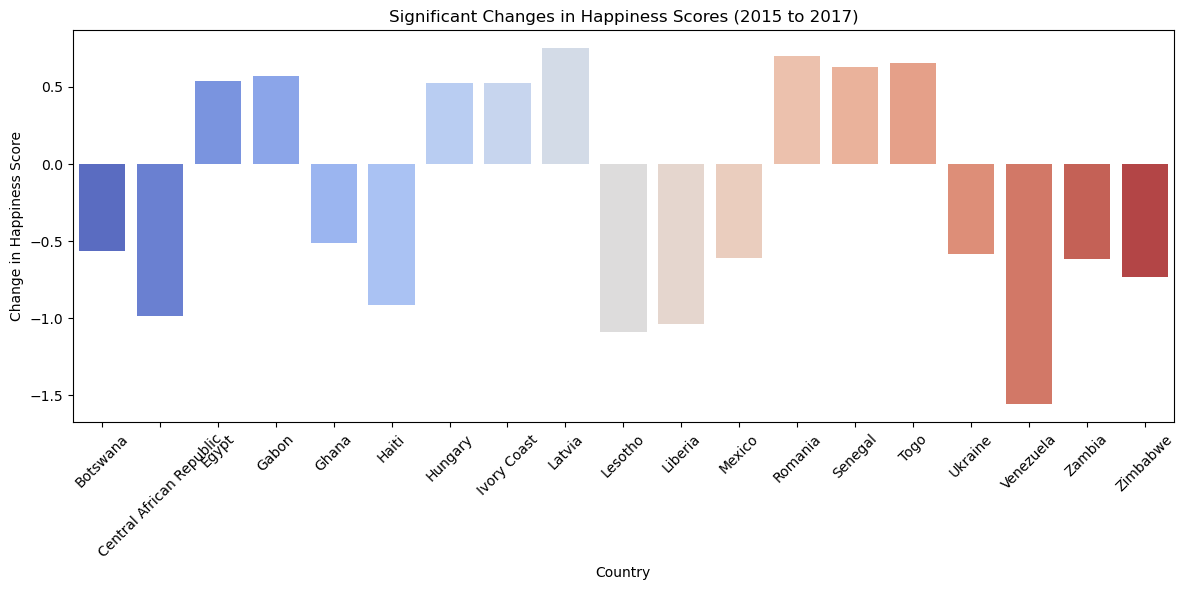

In [467]:



significant_changes.reset_index(inplace=True)

# Set the figure size
plt.figure(figsize=(12, 6))

# Create a bar plot
sns.barplot(data=significant_changes, x='Country', y='Change', palette='coolwarm')

# Add titles and labels
plt.title('Significant Changes in Happiness Scores (2015 to 2017)')
plt.xlabel('Country')
plt.ylabel('Change in Happiness Score')

                        
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()
plt.show()

In [475]:
df_rank_all_years[df_rank_all_years["Country"] == "Venezuela"] 

,Country,Happiness Rank,Happiness Score,Year
22,Venezuela,23,6.810,2015
201,Venezuela,44,6.084,2016
396,Venezuela,82,5.250,2017


**Venezuela** experienced the most significant decline in its ranking over the three-year period from 2015 to 2017

In [479]:
df_rank_all_years[df_rank_all_years["Country"] == "Latvia"]

,Country,Happiness Rank,Happiness Score,Year
88,Latvia,89,5.098,2015
225,Latvia,68,5.560,2016
368,Latvia,54,5.850,2017


On the other side, **Latvia** is the most country increasing ranking over the three years from 2015 to 2017